In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 3)

# default using seabron style
%matplotlib inline
plt.style.use('seaborn')

## Dataset
Illustrate line plots using stock data using pandas_datareader. Note yahoo finance API is not accurate or reliable, we use it for demonstration ONLY

In [2]:
# seaborn tip data
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips.tip / tips.total_bill * 100
tips.shape
tips.head()
tips.day.unique()
tips['size'].unique()

(244, 8)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.945
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054
2,21.01,3.50,Male,No,Sun,Dinner,3,16.659
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978
4,24.59,3.61,Female,No,Sun,Dinner,4,14.681


[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

array([2, 3, 4, 1, 6, 5])

## Bar charts
Pie chart is often seen in dashboard or report. It has advantages and disadvantages
- pros
 - simple, represent fraction as part of whole.
 - easy to consume, reader see a comparison at a glance, especially the biggest pie and the smallest pie
- cons
 - a chart with too many pies is difficult to distinguish
 - to compare the size is usually easier with bar chart
 - not intuitive negative values
- Seaborn does not support pie chart

### Matplotlib pie chart
- basic pie chart
- explode, legend
- donut chart
- nested pie chart

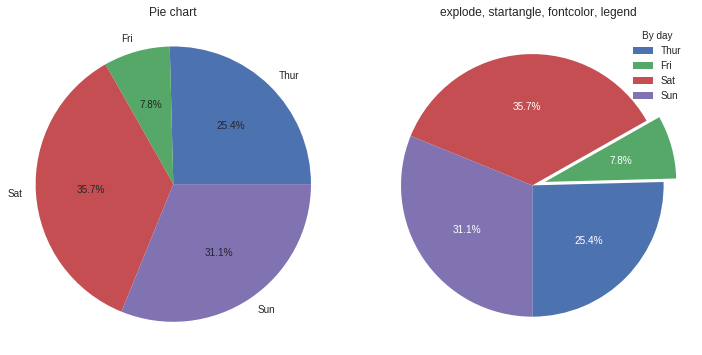

In [3]:
# pie chart show fraction by day
# add labels and percentage
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
count_byday = tips.groupby('day').day.count()
count_bysize = tips.groupby('size')['size'].count()
axes[0].pie(count_byday.values, labels=count_byday.index, autopct='%.1f%%');
axes[0].axis('equal');
axes[0].set_title('Pie chart')

# explode the 2nd slice
# add legend
my_explode = np.zeros_like(count_byday.values).astype('float')
my_explode[1] = 0.1
#plt.pie(count_byday.values, labels=count_byday.index, autopct='%.1f%%', explode=my_explode);
patches, texts, autotexts = axes[1].pie(
    count_byday.values, labels=count_byday.index, autopct='%.1f%%',
    explode=my_explode, startangle=-90, textprops=dict(color="w"));
axes[1].axis('equal');
axes[1].set_title('explode, startangle, fontcolor, legend');
axes[1].legend(patches, count_byday.index, title='By day');

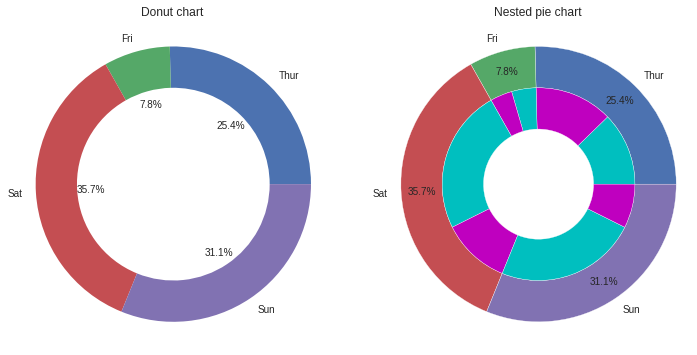

In [4]:
# donut chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
count_byday = tips.groupby('day').day.count()
count_bysize = tips.groupby('size')['size'].count()
axes[0].pie(count_byday.values, labels=count_byday.index, autopct='%.1f%%', wedgeprops=dict(width=0.3));
axes[0].axis('equal');
axes[0].set_title('Donut chart')

# nested pie chart
tips_crosstab = pd.crosstab(tips.day, tips.sex)
tips_2d = tips_crosstab.values
ring_size = 0.3
axes[1].pie(tips_2d.sum(axis=1), labels=tips_crosstab.index, autopct='%.1f%%',
            radius=1, pctdistance=0.85, wedgeprops=dict(width=ring_size, edgecolor='w'))
axes[1].pie(tips_2d.flatten(), radius=1-ring_size, colors=['c', 'm'],
            pctdistance=0.7, wedgeprops=dict(width=ring_size, edgecolor='w'))
axes[1].axis('equal');
axes[1].set_title('Nested pie chart');

## Pandas pie chart
- Easier to use
- Can create subplots for multiple columns

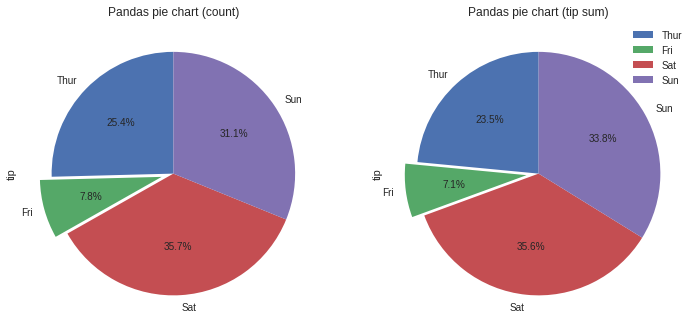

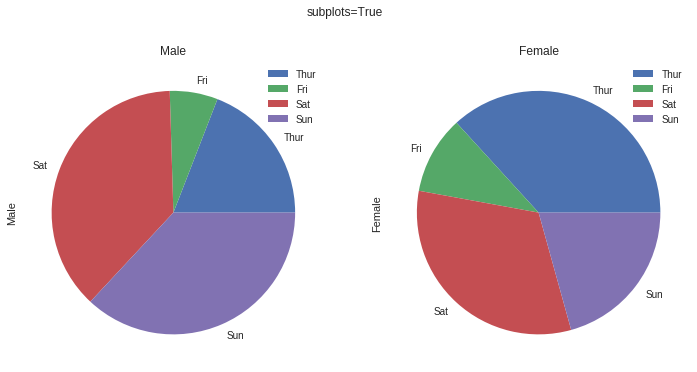

In [5]:
# pandas pie chart
# dataframe specify y=col_name or series plot
count_byday = tips.groupby('day').count()
sum_byday = tips.groupby('day').tip.sum()
fig, axes = plt.subplots(1, 2, figsize=(12, 6));
count_byday.plot.pie(y='tip', autopct='%.1f%%', explode=my_explode, legend=False, startangle=90, ax=axes[0]);
axes[0].set_title('Pandas pie chart (count)');
sum_byday.plot.pie(autopct='%.1f%%', explode=my_explode, legend=True, startangle=90, ax=axes[1]);
axes[1].set_title('Pandas pie chart (tip sum)');

# dataframe subplots=True if not specifying y
cols = tips_crosstab.columns
axes = tips_crosstab.plot.pie(subplots=True, figsize=(12, 6));
axes[0].set_title(f"{cols[0]}");
axes[1].set_title(f"{cols[1]}");
plt.suptitle('subplots=True');